# The YouTube Business

Since its creation in 2005 Youtube has been a popular website. It is used by pretty much everyone who has internet, whether it is for laughs or life hacks, Youtube has every kind of video. This means that it is also a very profitable source of income if you start a channel and get it right. This notebook will highlight key ingredients to making Youtube videos trend.

The data for this project wil be on US Youtube statistics from October and November 2021. 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import csv

In [2]:
from google.colab import files
uploaded = files.upload()

Saving US_youtube_trending_oct_nov.csv to US_youtube_trending_oct_nov.csv


In [3]:
file = "US_youtube_trending_oct_nov.csv"
import io
dataf = pd.read_csv(io.BytesIO(uploaded[file]))
dataf.head()

,Video_ID,Title,publishedAt,Published_Date,Channel_ID,Channel_Title,Category_ID,Trending Date,trending_date,Tags,View_Count,Likes,Dislikes,Comment_Count,thumbnail_link,Comments_Disabled,Ratings_Disabled,description,Unnamed: 18
0,U3ASj1L6_sY,Adele - Easy On Me (Official Video),2021-10-14T23:00:11Z,2021-10-14,UComP_epzeKzvBX156r6pm1Q,AdeleVEVO,10.0,2021-11-05,2021-11-05T00:00:00Z,There ainâ€™t no gold|In this river|That Iâ€™v...,139547582.0,4714130.0,59433.0,241678.0,https://i.ytimg.com/vi/U3ASj1L6_sY/default.jpg,False,False,Official Video for Easy On Me by Adele.Shop th...,NaN
1,U3ASj1L6_sY,Adele - Easy On Me (Official Video),2021-10-14T23:00:11Z,2021-10-14,UComP_epzeKzvBX156r6pm1Q,AdeleVEVO,10.0,2021-10-31,2021-10-31T00:00:00Z,There ainâ€™t no gold|In this river|That Iâ€™v...,128930039.0,4570558.0,56473.0,238591.0,https://i.ytimg.com/vi/U3ASj1L6_sY/default.jpg,False,False,Official Video for Easy On Me by Adele.Shop th...,NaN
2,U3ASj1L6_sY,Adele - Easy On Me (Official Video),2021-10-14T23:00:11Z,2021-10-14,UComP_epzeKzvBX156r6pm1Q,AdeleVEVO,10.0,2021-10-30,2021-10-30T00:00:00Z,There ainâ€™t no gold|In this river|That Iâ€™v...,126257349.0,4536502.0,55733.0,237889.0,https://i.ytimg.com/vi/U3ASj1L6_sY/default.jpg,False,False,Official Video for Easy On Me by Adele.Shop th...,NaN
3,U3ASj1L6_sY,Adele - Easy On Me (Official Video),2021-10-14T23:00:11Z,2021-10-14,UComP_epzeKzvBX156r6pm1Q,AdeleVEVO,10.0,2021-10-29,2021-10-29T00:00:00Z,There ainâ€™t no gold|In this river|That Iâ€™v...,123400270.0,4497222.0,54838.0,236641.0,https://i.ytimg.com/vi/U3ASj1L6_sY/default.jpg,False,False,Official Video for Easy On Me by Adele.Shop th...,NaN
4,U3ASj1L6_sY,Adele - Easy On Me (Official Video),2021-10-14T23:00:11Z,2021-10-14,UComP_epzeKzvBX156r6pm1Q,AdeleVEVO,10.0,2021-10-28,2021-10-28T00:00:00Z,There ainâ€™t no gold|In this river|That Iâ€™v...,120612827.0,4455233.0,53922.0,234616.0,https://i.ytimg.com/vi/U3ASj1L6_sY/default.jpg,False,False,Official Video for Easy On Me by Adele.Shop th...,NaN


In [4]:
dataf.dtypes

Video_ID              object
Title                 object
publishedAt           object
Published_Date        object
Channel_ID            object
Channel_Title         object
Category_ID          float64
Trending Date         object
trending_date         object
Tags                  object
View_Count           float64
Likes                float64
Dislikes             float64
Comment_Count        float64
thumbnail_link        object
Comments_Disabled     object
Ratings_Disabled      object
description           object
Unnamed: 18           object
dtype: object

Getting rid of irrelevant data

In [5]:
dataf = dataf.drop(columns=['description','Unnamed: 18','Comments_Disabled','Ratings_Disabled','trending_date','publishedAt'])
dataf.head()

,Video_ID,Title,Published_Date,Channel_ID,Channel_Title,Category_ID,Trending Date,Tags,View_Count,Likes,Dislikes,Comment_Count,thumbnail_link
0,U3ASj1L6_sY,Adele - Easy On Me (Official Video),2021-10-14,UComP_epzeKzvBX156r6pm1Q,AdeleVEVO,10.0,2021-11-05,There ainâ€™t no gold|In this river|That Iâ€™v...,139547582.0,4714130.0,59433.0,241678.0,https://i.ytimg.com/vi/U3ASj1L6_sY/default.jpg
1,U3ASj1L6_sY,Adele - Easy On Me (Official Video),2021-10-14,UComP_epzeKzvBX156r6pm1Q,AdeleVEVO,10.0,2021-10-31,There ainâ€™t no gold|In this river|That Iâ€™v...,128930039.0,4570558.0,56473.0,238591.0,https://i.ytimg.com/vi/U3ASj1L6_sY/default.jpg
2,U3ASj1L6_sY,Adele - Easy On Me (Official Video),2021-10-14,UComP_epzeKzvBX156r6pm1Q,AdeleVEVO,10.0,2021-10-30,There ainâ€™t no gold|In this river|That Iâ€™v...,126257349.0,4536502.0,55733.0,237889.0,https://i.ytimg.com/vi/U3ASj1L6_sY/default.jpg
3,U3ASj1L6_sY,Adele - Easy On Me (Official Video),2021-10-14,UComP_epzeKzvBX156r6pm1Q,AdeleVEVO,10.0,2021-10-29,There ainâ€™t no gold|In this river|That Iâ€™v...,123400270.0,4497222.0,54838.0,236641.0,https://i.ytimg.com/vi/U3ASj1L6_sY/default.jpg
4,U3ASj1L6_sY,Adele - Easy On Me (Official Video),2021-10-14,UComP_epzeKzvBX156r6pm1Q,AdeleVEVO,10.0,2021-10-28,There ainâ€™t no gold|In this river|That Iâ€™v...,120612827.0,4455233.0,53922.0,234616.0,https://i.ytimg.com/vi/U3ASj1L6_sY/default.jpg


**Views**

The most important metric to channel owners is view count on any given video. More views means more money, that simple.

In [6]:
most_viewed = dataf.sort_values(by=['View_Count'],ascending=False)
most_viewed

,Video_ID,Title,Published_Date,Channel_ID,Channel_Title,Category_ID,Trending Date,Tags,View_Count,Likes,Dislikes,Comment_Count,thumbnail_link
0,U3ASj1L6_sY,Adele - Easy On Me (Official Video),2021-10-14,UComP_epzeKzvBX156r6pm1Q,AdeleVEVO,10.0,2021-11-05,There ainâ€™t no gold|In this river|That Iâ€™v...,139547582.0,4714130.0,59433.0,241678.0,https://i.ytimg.com/vi/U3ASj1L6_sY/default.jpg
1,U3ASj1L6_sY,Adele - Easy On Me (Official Video),2021-10-14,UComP_epzeKzvBX156r6pm1Q,AdeleVEVO,10.0,2021-10-31,There ainâ€™t no gold|In this river|That Iâ€™v...,128930039.0,4570558.0,56473.0,238591.0,https://i.ytimg.com/vi/U3ASj1L6_sY/default.jpg
2,U3ASj1L6_sY,Adele - Easy On Me (Official Video),2021-10-14,UComP_epzeKzvBX156r6pm1Q,AdeleVEVO,10.0,2021-10-30,There ainâ€™t no gold|In this river|That Iâ€™v...,126257349.0,4536502.0,55733.0,237889.0,https://i.ytimg.com/vi/U3ASj1L6_sY/default.jpg
3,U3ASj1L6_sY,Adele - Easy On Me (Official Video),2021-10-14,UComP_epzeKzvBX156r6pm1Q,AdeleVEVO,10.0,2021-10-29,There ainâ€™t no gold|In this river|That Iâ€™v...,123400270.0,4497222.0,54838.0,236641.0,https://i.ytimg.com/vi/U3ASj1L6_sY/default.jpg
4,U3ASj1L6_sY,Adele - Easy On Me (Official Video),2021-10-14,UComP_epzeKzvBX156r6pm1Q,AdeleVEVO,10.0,2021-10-28,There ainâ€™t no gold|In this river|That Iâ€™v...,120612827.0,4455233.0,53922.0,234616.0,https://i.ytimg.com/vi/U3ASj1L6_sY/default.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8663,o5OViKXmNiw,Start a Fire with a pencil,2021-11-13,UCNCdr-jdGmRaYqADGxAfzFQ,Speir Outdoors,27.0,2021-11-16,pencil fire|fire|starting fires|fire starting|...,74570.0,3101.0,110.0,183.0,https://i.ytimg.com/vi/o5OViKXmNiw/default.jpg
8664,bYp3ni9izks,The Zone of Adventure: Imbalance - Trailer,2021-11-08,UC6k_GngLDtxbkUlZOq6_h5g,The McElroy Family,24.0,2021-11-09,my brother my brother and me|mcelroy|justin mc...,70588.0,6891.0,61.0,418.0,https://i.ytimg.com/vi/bYp3ni9izks/default.jpg
8665,o5OViKXmNiw,Start a Fire with a pencil,2021-11-13,UCNCdr-jdGmRaYqADGxAfzFQ,Speir Outdoors,27.0,2021-11-15,pencil fire|fire|starting fires|fire starting|...,69151.0,2880.0,100.0,129.0,https://i.ytimg.com/vi/o5OViKXmNiw/default.jpg
8666,o5OViKXmNiw,Start a Fire with a pencil,2021-11-13,UCNCdr-jdGmRaYqADGxAfzFQ,Speir Outdoors,27.0,2021-11-14,pencil fire|fire|starting fires|fire starting|...,65858.0,2696.0,100.0,121.0,https://i.ytimg.com/vi/o5OViKXmNiw/default.jpg


In [7]:
average_views = dataf['View_Count'].mean()
print('Average views for trending videos is',average_views)

Average views for trending videos is 2581374.1510326527


**Categories**

Our data is split into categories based on the kind of video it is. The popular categories are:

1: Movies

10: Music

17: Sports

23: Entertainment


So lets take a look at these categories


In [8]:
sports = dataf[dataf["Category_ID"] == 17.0]
sports_views = sports['View_Count'].mean()
print('Average views for trending sports videos is',sports_views)
entertainment = dataf[dataf["Category_ID"] == 23.0]
entertainment_views = entertainment['View_Count'].mean()
print('Average views for entertainment videos is',entertainment_views)
movies = dataf[dataf["Category_ID"] == 1.0]
movies_views = movies['View_Count'].mean()
print('Average views for movie content is', movies_views)
music = dataf[dataf['Category_ID'] == 10.0]
music_views = music['View_Count'].mean()
print('Average views for trending music videos is',music_views)

Average views for trending sports videos is 2961343.5372393248
Average views for entertainment videos is 4711979.61013986
Average views for movie content is 3110900.5110497237
Average views for trending music videos is 5423842.100519931


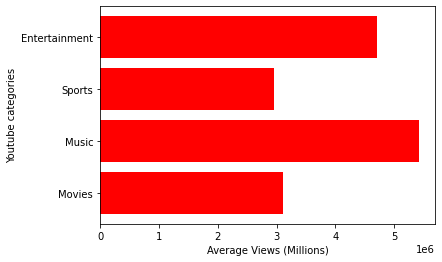

In [9]:
x = np.array(["Movies", "Music", "Sports", "Entertainment"])
y = np.array([movies_views,music_views,sports_views,entertainment_views])

plt.barh(x,y,color= 'red')
plt.xlabel("Average Views (Millions)")
plt.ylabel("Youtube categories")
plt.show()

Lets look at 3 categories that are a lot more individual. 28 is on Technology, 20 is Gaming, and 26 is Food.

In [10]:
gaming = dataf[dataf["Category_ID"] == 20.0]
gaming_views = gaming['View_Count'].mean()
print('Average views for trending sports videos is',gaming_views)
food = dataf[dataf["Category_ID"] == 26.0]
food_views = food['View_Count'].mean()
print('Average views for trending sports videos is',food_views)
tech = dataf[dataf["Category_ID"] == 28.0]
tech_views = tech['View_Count'].mean()
print('Average views for trending sports videos is',tech_views)

Average views for trending sports videos is 1562252.7660764214
Average views for trending sports videos is 974500.649122807
Average views for trending sports videos is 2000140.3770491802


Compare them to big categories

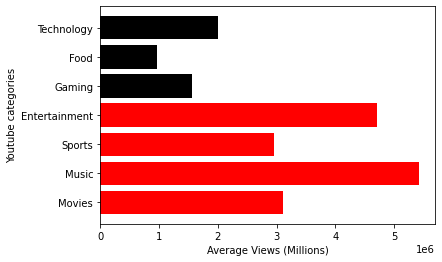

In [28]:
x = np.array(["Movies", "Music", "Sports", "Entertainment","Gaming","Food","Technology"])
y = np.array([movies_views,music_views,sports_views,entertainment_views,gaming_views,food_views,tech_views])

plt.barh(x,y,color= ['red','red','red','red','black','black','black'])
plt.xlabel("Average Views (Millions)")
plt.ylabel("Youtube categories")
plt.show()

As we can see the view count for these categories is not as big but they are still videos that trend and make a lot of money for those running those channels. Since these channels can't always rely on the appeal of a global fan base, there has to something else that get these videos trending.

**Likes and Comments** 

In [20]:
avg_likes = dataf['Likes'].mean()
print('Average likes for trending videos is',avg_likes)

Average likes for trending videos is 141054.4477904696


In [21]:
most_liked = dataf.sort_values(by=['Likes'],ascending=False)
most_liked

,Video_ID,Title,Published_Date,Channel_ID,Channel_Title,Category_ID,Trending Date,Tags,View_Count,Likes,Dislikes,Comment_Count,thumbnail_link
10,MbWq-EwUy_M,Dice Stacks from $1 to $100,2021-10-06,UChfTcl5XfdTUCjkfuro982Q,That's Amazing Shorts,17.0,2021-10-29,[None],103564168.0,7174425.0,120961.0,23727.0,https://i.ytimg.com/vi/MbWq-EwUy_M/default.jpg
13,MbWq-EwUy_M,Dice Stacks from $1 to $100,2021-10-06,UChfTcl5XfdTUCjkfuro982Q,That's Amazing Shorts,17.0,2021-10-26,[None],90801004.0,6312184.0,101610.0,19686.0,https://i.ytimg.com/vi/MbWq-EwUy_M/default.jpg
14,MbWq-EwUy_M,Dice Stacks from $1 to $100,2021-10-06,UChfTcl5XfdTUCjkfuro982Q,That's Amazing Shorts,17.0,2021-10-25,[None],89297068.0,6189242.0,99229.0,19323.0,https://i.ytimg.com/vi/MbWq-EwUy_M/default.jpg
15,MbWq-EwUy_M,Dice Stacks from $1 to $100,2021-10-06,UChfTcl5XfdTUCjkfuro982Q,That's Amazing Shorts,17.0,2021-10-24,[None],87485147.0,6043168.0,96563.0,18863.0,https://i.ytimg.com/vi/MbWq-EwUy_M/default.jpg
18,MbWq-EwUy_M,Dice Stacks from $1 to $100,2021-10-06,UChfTcl5XfdTUCjkfuro982Q,That's Amazing Shorts,17.0,2021-10-23,[None],85781169.0,5905584.0,93950.0,18426.0,https://i.ytimg.com/vi/MbWq-EwUy_M/default.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,n7-RReFPXag,Eliminatorias | Brasil 4-1 Uruguay | Fecha 12,2021-10-15,UCzU8-lZlRfkV3nj0RzAZdrQ,CONMEBOL,17.0,2021-10-18,fÃºtbol|pelota|gol|copa|libertadores|sudameric...,4641866.0,0.0,0.0,7667.0,https://i.ytimg.com/vi/n7-RReFPXag/default.jpg
7205,W4LOsx9Cgts,Galaxy Unpacked Part 2 October 2021: Official ...,2021-10-20,UCWwgaK7x0_FR1goeSRazfsQ,Samsung,28.0,2021-10-21,Samsungevent|SamsungEvent|Galaxy Unpacked|Sams...,365418.0,0.0,0.0,0.0,https://i.ytimg.com/vi/W4LOsx9Cgts/default.jpg
815,n7-RReFPXag,Eliminatorias | Brasil 4-1 Uruguay | Fecha 12,2021-10-15,UCzU8-lZlRfkV3nj0RzAZdrQ,CONMEBOL,17.0,2021-10-19,fÃºtbol|pelota|gol|copa|libertadores|sudameric...,4819420.0,0.0,0.0,7873.0,https://i.ytimg.com/vi/n7-RReFPXag/default.jpg
7056,W4LOsx9Cgts,Galaxy Unpacked Part 2 October 2021: Official ...,2021-10-20,UCWwgaK7x0_FR1goeSRazfsQ,Samsung,28.0,2021-10-22,Samsungevent|SamsungEvent|Galaxy Unpacked|Sams...,389036.0,0.0,0.0,0.0,https://i.ytimg.com/vi/W4LOsx9Cgts/default.jpg


In [22]:
most_comments = dataf.sort_values(by=['Likes'],ascending=False)
most_comments

,Video_ID,Title,Published_Date,Channel_ID,Channel_Title,Category_ID,Trending Date,Tags,View_Count,Likes,Dislikes,Comment_Count,thumbnail_link
10,MbWq-EwUy_M,Dice Stacks from $1 to $100,2021-10-06,UChfTcl5XfdTUCjkfuro982Q,That's Amazing Shorts,17.0,2021-10-29,[None],103564168.0,7174425.0,120961.0,23727.0,https://i.ytimg.com/vi/MbWq-EwUy_M/default.jpg
13,MbWq-EwUy_M,Dice Stacks from $1 to $100,2021-10-06,UChfTcl5XfdTUCjkfuro982Q,That's Amazing Shorts,17.0,2021-10-26,[None],90801004.0,6312184.0,101610.0,19686.0,https://i.ytimg.com/vi/MbWq-EwUy_M/default.jpg
14,MbWq-EwUy_M,Dice Stacks from $1 to $100,2021-10-06,UChfTcl5XfdTUCjkfuro982Q,That's Amazing Shorts,17.0,2021-10-25,[None],89297068.0,6189242.0,99229.0,19323.0,https://i.ytimg.com/vi/MbWq-EwUy_M/default.jpg
15,MbWq-EwUy_M,Dice Stacks from $1 to $100,2021-10-06,UChfTcl5XfdTUCjkfuro982Q,That's Amazing Shorts,17.0,2021-10-24,[None],87485147.0,6043168.0,96563.0,18863.0,https://i.ytimg.com/vi/MbWq-EwUy_M/default.jpg
18,MbWq-EwUy_M,Dice Stacks from $1 to $100,2021-10-06,UChfTcl5XfdTUCjkfuro982Q,That's Amazing Shorts,17.0,2021-10-23,[None],85781169.0,5905584.0,93950.0,18426.0,https://i.ytimg.com/vi/MbWq-EwUy_M/default.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,n7-RReFPXag,Eliminatorias | Brasil 4-1 Uruguay | Fecha 12,2021-10-15,UCzU8-lZlRfkV3nj0RzAZdrQ,CONMEBOL,17.0,2021-10-18,fÃºtbol|pelota|gol|copa|libertadores|sudameric...,4641866.0,0.0,0.0,7667.0,https://i.ytimg.com/vi/n7-RReFPXag/default.jpg
7205,W4LOsx9Cgts,Galaxy Unpacked Part 2 October 2021: Official ...,2021-10-20,UCWwgaK7x0_FR1goeSRazfsQ,Samsung,28.0,2021-10-21,Samsungevent|SamsungEvent|Galaxy Unpacked|Sams...,365418.0,0.0,0.0,0.0,https://i.ytimg.com/vi/W4LOsx9Cgts/default.jpg
815,n7-RReFPXag,Eliminatorias | Brasil 4-1 Uruguay | Fecha 12,2021-10-15,UCzU8-lZlRfkV3nj0RzAZdrQ,CONMEBOL,17.0,2021-10-19,fÃºtbol|pelota|gol|copa|libertadores|sudameric...,4819420.0,0.0,0.0,7873.0,https://i.ytimg.com/vi/n7-RReFPXag/default.jpg
7056,W4LOsx9Cgts,Galaxy Unpacked Part 2 October 2021: Official ...,2021-10-20,UCWwgaK7x0_FR1goeSRazfsQ,Samsung,28.0,2021-10-22,Samsungevent|SamsungEvent|Galaxy Unpacked|Sams...,389036.0,0.0,0.0,0.0,https://i.ytimg.com/vi/W4LOsx9Cgts/default.jpg


In [23]:
gaming_likes = gaming['Likes'].mean()
print('Average likes for trending gaming videos is',gaming_likes)
food_likes = food['Likes'].mean()
print('Average likes for trending food videos is',food_likes)
tech_likes = tech['Likes'].mean()
print('Average likes for trending tech videos is',tech_likes)
movies_likes = movies['Likes'].mean()
print('Average likes for movie content is',movies_likes)
entertainment_likes = entertainment['Likes'].mean()
print('Average likes for entertainment videos is',entertainment_likes)

Average likes for trending gaming videos is 89065.88303821062
Average likes for trending food videos is 49482.68421052631
Average likes for trending tech videos is 111318.90983606558
Average likes for movie content is 128648.25414364641
Average likes for entertainment videos is 223793.71853146853


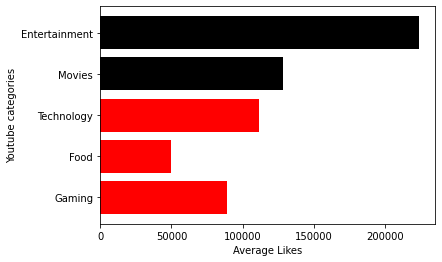

In [24]:
x = np.array(["Gaming","Food","Technology","Movies",'Entertainment'])
y = np.array([gaming_likes,food_likes,tech_likes,movies_likes,entertainment_likes])

plt.barh(x,y,color= ['red','red','red','black','black','black'])
plt.xlabel("Average Likes")
plt.ylabel("Youtube categories")
plt.show()

As we can see with the likes, the smaller categories are in a similar range to the big youtube channels.

In [25]:
gaming_comments = gaming['Comment_Count'].mean()
print('Average likes for trending gaming videos is',gaming_comments)
food_comments = food['Comment_Count'].mean()
print('Average likes for trending food videos is',food_comments)
tech_comments = tech['Comment_Count'].mean()
print('Average likes for trending tech videos is',tech_comments)
movies_comments = movies['Comment_Count'].mean()
print('Average likes for movie content is',movies_comments)
entertainment_comments = entertainment['Comment_Count'].mean()
print('Average likes for entertainment videos is',entertainment_comments)

Average likes for trending gaming videos is 5917.910997204101
Average likes for trending food videos is 3090.6447368421054
Average likes for trending tech videos is 5088.0327868852455
Average likes for movie content is 8289.149171270717
Average likes for entertainment videos is 5688.297202797203


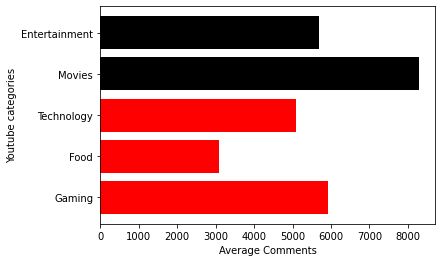

In [26]:
x = np.array(["Gaming","Food","Technology","Movies",'Entertainment'])
y = np.array([gaming_comments,food_comments,tech_comments,movies_comments,entertainment_comments])

plt.barh(x,y,color= ['red','red','red','black','black','black'])
plt.xlabel("Average Comments")
plt.ylabel("Youtube categories")
plt.show()

Sources:

https://www.kaggle.com/rsrishav/youtube-trending-video-dataset 

A report by Joshua Ssemwanga